In [47]:
import os 
import nltk
import re


from nltk.corpus.reader.plaintext import PlaintextCorpusReader

path = "./"
os.chdir(path)
dict_text = {}
dict_token = {}

for file in os.listdir()[:3]:
    if file.endswith(".txt"):
        file_path = f"{path}\{file}"
        data = open(file_path, 'r', encoding="utf-8-sig")
        tokenize = data.read()
        tokenize_no_nb = re.sub(r'\d+', '', tokenize)
        clean = tokenize_no_nb.replace("_", "")
        dict_text[file] = data.read()

        # Extraire des tokens convert en une list de token
        token_list = nltk.word_tokenize(clean)
        print("Token list : ", token_list[:20])
        print("Total tokens : ", len(token_list), "\n")
        dict_token[file] = token_list

Token list :  ['The', 'Project', 'Gutenberg', 'EBook', 'of', 'Alice', 'in', 'Wonderland', ',', 'by', 'Alice', 'Gerstenberg', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone']
Total tokens :  22377 

Token list :  ['Project', 'Gutenberg', "'s", 'Among', 'the', 'Forest', 'People', ',', 'by', 'Clara', 'Dillingham', 'Pierson', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone']
Total tokens :  40402 

Token list :  ['The', 'Project', 'Gutenberg', 'EBook', 'of', 'An', 'Introductory', 'Course', 'of', 'Quantitative', 'Chemical', 'Analysis', ',', 'by', 'Henry', 'P.', 'Talbot', 'This', 'eBook', 'is']
Total tokens :  80653 



In [40]:
from nltk.corpus import stopwords

for keys, values in dict_token.items():
    corpus = PlaintextCorpusReader(os.getcwd(), keys)
    # Extraire id de fichier du corpus
    print("Fichier dans le corpus :", corpus.fileids(), "\n")

    # print("Données lues à partir des fichier : ", corpus.raw()[:70])

    # Extraire paragraphes du corpus
    paragraphs = corpus.paras()
    print("Nombre total de paragraphs corpus :", len(paragraphs))

    # Extraire phrases du corpus
    sentences = corpus.sents()
    print("Nombre total de phrases dans ce corpus : ", len(sentences))
    print("Première phrase : ", sentences[0], "\n")

    # Trouver la distribution de fréquence des mots dans le corpus
    course_freq_dist = nltk.FreqDist(corpus.words())

    # Mots les plus utilisés et leur nb de fois qu'ils apparaissent 
    print("Top 10 des mots du corpus : ", course_freq_dist.most_common(10), "\n\n")

Fichier dans le corpus : ['alice-in-wonderland.txt'] 

Nombre total de paragraphs corpus : 2034
Nombre total de phrases dans ce corpus :  2625
Première phrase :  ['The', 'Project', 'Gutenberg', 'EBook', 'of', 'Alice', 'in', 'Wonderland', ',', 'by', 'Alice', 'Gerstenberg'] 

Top 10 des mots du corpus :  [('.', 1221), (',', 935), ('the', 752), ("'", 682), ('I', 458), ('you', 438), ('and', 436), ('to', 395), ('a', 372), ('ALICE', 354)] 


Fichier dans le corpus : ['Among the Forest People.txt'] 

Nombre total de paragraphs corpus : 649
Nombre total de phrases dans ce corpus :  2155
Première phrase :  ['Project', 'Gutenberg', "'", 's', 'Among', 'the', 'Forest', 'People', ',', 'by', 'Clara', 'Dillingham', 'Pierson'] 

Top 10 des mots du corpus :  [(',', 1877), ('.', 1712), ('the', 1639), ('and', 1177), ('to', 889), ('"', 668), ('of', 666), ('a', 656), ('he', 533), ('that', 483)] 


Fichier dans le corpus : ['An Introductory Course of Quantitative Chemical Analysis.txt'] 

Nombre total de pa

Tokenisation de texte (processus décomposit° en mots, termes, symboles, etc.)

In [41]:
# Utilisation package punkt pour extraire les tokens
dict_punkt = {}
for keys, values in dict_token.items():
    token_list2 = list(filter(lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, values)) 
    print("Liste des tokens après supp ponctuation : ", token_list2[:20])
    print("Total des tokens aprè supp ponctuation : ", len(token_list2), "\n")
    dict_punkt[keys] = token_list2

Liste des tokens après supp ponctuation :  ['The', 'Project', 'Gutenberg', 'EBook', 'of', 'Alice', 'in', 'Wonderland', 'by', 'Alice', 'Gerstenberg', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere']
Total des tokens aprè supp ponctuation :  18608 

Liste des tokens après supp ponctuation :  ['Project', 'Gutenberg', "'s", 'Among', 'the', 'Forest', 'People', 'by', 'Clara', 'Dillingham', 'Pierson', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere']
Total des tokens aprè supp ponctuation :  34606 

Liste des tokens après supp ponctuation :  ['The', 'Project', 'Gutenberg', 'EBook', 'of', 'An', 'Introductory', 'Course', 'of', 'Quantitative', 'Chemical', 'Analysis', 'by', 'Henry', 'P.', 'Talbot', 'This', 'eBook', 'is', 'for']
Total des tokens aprè supp ponctuation :  65047 



Comparaison nb total de token dans txt: Avant nettoyage poncutation VS Après nettoyage 

Fichier 1 -> Total tokens :  **22377** | **18608**

Fichier 2 -> Total tokens :  **40400** | **34606** 

Fichier 3 -> Total tokens :  **80653** | **65047**

Convertir token en minuscule les tokens

In [42]:
# Conversion en minuscule
for keys, values in dict_punkt.items():
    token_list3 =[word.lower() for word in values]
    print("List tokens après conversion en lower : ", token_list3[:20], "\n")
    dict_punkt[keys] = token_list3

List tokens après conversion en lower :  ['the', 'project', 'gutenberg', 'ebook', 'of', 'alice', 'in', 'wonderland', 'by', 'alice', 'gerstenberg', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere'] 

List tokens après conversion en lower :  ['project', 'gutenberg', "'s", 'among', 'the', 'forest', 'people', 'by', 'clara', 'dillingham', 'pierson', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere'] 

List tokens après conversion en lower :  ['the', 'project', 'gutenberg', 'ebook', 'of', 'an', 'introductory', 'course', 'of', 'quantitative', 'chemical', 'analysis', 'by', 'henry', 'p.', 'talbot', 'this', 'ebook', 'is', 'for'] 



In [43]:
# nltk.download('stopwords')
from nltk.corpus import stopwords

# Remove stopwords
for keys, values in dict_punkt.items():
    
    token_list4 = list(filter(lambda token : token not in stopwords.words('english'), values))
    print("List tokens après supp mots vides : ", token_list4[:20])
    print("\nTotal tokens après supp mots vides : ", len(token_list4))
    dict_punkt[keys] = token_list4

List tokens après supp mots vides :  ['project', 'gutenberg', 'ebook', 'alice', 'wonderland', 'alice', 'gerstenberg', 'ebook', 'use', 'anyone', 'anywhere', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 're-use']

Total tokens après supp mots vides :  9872
List tokens après supp mots vides :  ['project', 'gutenberg', "'s", 'among', 'forest', 'people', 'clara', 'dillingham', 'pierson', 'ebook', 'use', 'anyone', 'anywhere', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give']

Total tokens après supp mots vides :  15952
List tokens après supp mots vides :  ['project', 'gutenberg', 'ebook', 'introductory', 'course', 'quantitative', 'chemical', 'analysis', 'henry', 'p.', 'talbot', 'ebook', 'use', 'anyone', 'anywhere', 'cost', 'almost', 'restrictions', 'whatsoever', 'may']

Total tokens après supp mots vides :  35233


Comparaison nb total de token dans txt: Avant nettoyage mots vides VS Après nettoyage 

Fichier 1 -> Total tokens :  **18608** | **9872**

Fichier 2 -> Total tokens :  **34606** | **15952** 

Fichier 3 -> Total tokens :  **65047** | **35233**

In [48]:
for keys, values in dict_punkt.items():
    course_freq_dist = nltk.FreqDist(values)
    print("Top 10 des mots du corpus : ", course_freq_dist.most_common(10), "\n\n")

Top 10 des mots du corpus :  [('alice', 402), ("'s", 231), ("n't", 220), ('queen', 175), ('white', 97), ('project', 87), ('know', 86), ('king', 73), ('one', 67), ('would', 65)] 


Top 10 des mots du corpus :  [('said', 252), ('would', 193), ('one', 143), ('could', 131), ("n't", 127), ('see', 116), ('little', 112), ('ground', 104), ('forest', 98), ('people', 93)] 


Top 10 des mots du corpus :  [('solution', 765), ('acid', 655), ('cc', 402), ('note', 331), ('water', 286), ('may', 257), ('weight', 225), ('solutions', 192), ('iron', 186), ('precipitate', 177)] 




alice-in-wonderland.txt


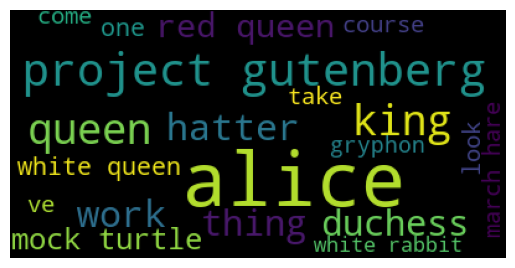

Among the Forest People.txt


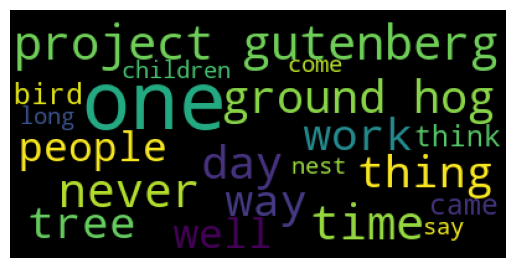

An Introductory Course of Quantitative Chemical Analysis.txt


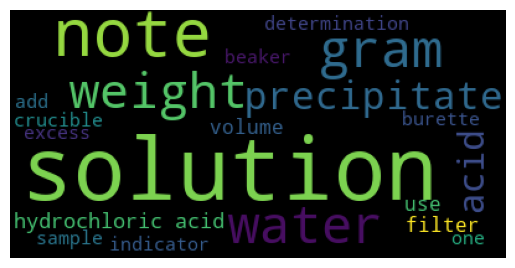

In [49]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
for books in dict_punkt.keys() : 

  print(books)
  stopwords = set(STOPWORDS)
  stopwords.update(["n't", "s", "|", "cc", "I", "_", "said", "see", "know", "tm", "may", "must", "thought", "used", "re", '_________'])
  unique_string=(" ").join(dict_punkt[books])
  # print(unique_string)
  wordcloud = WordCloud(stopwords = stopwords, background_color = 'black', max_words = 20).generate(unique_string)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()  

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

test = []
for word in dict_punkt.values():
  substitut = ' '.join(word)
  test.append(substitut)

vectorizer = TfidfVectorizer(analyzer='word')
tfidf=vectorizer.fit_transform(test)

# Affiche les mots/noms en vedette
print("Tokens utilisés : ")
print(vectorizer.get_feature_names_out()[:30])

    
# print("Les tokens utilisés comme fonctionnalités sont : ")
# print(vectorizer.get_feature_names_out()[30:70])


Tokens utilisés : 
['abbreviation' 'abide' 'ability' 'able' 'absence' 'absolute' 'absolutely'
 'absorb' 'absorbed' 'absorbent' 'absorbents' 'absorbing' 'absorbs'
 'absorption' 'absurd' 'accept' 'acceptable' 'accepted' 'accepting'
 'access' 'accessed' 'accessible' 'accident' 'accidental' 'accompanied'
 'accompanying' 'accomplish' 'accomplished' 'accomplishes' 'accordance']
